In [8]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import pandas as pd
import xarray as xr
import cartopy
import cartopy.crs as ccrs

In [9]:
# CMIP6 historical
fn_tas_sd_hist = '/usr/people/ijzerman/GradProject/DataFiles/CMIP6/historical/tas/*.nc'
tas_sd_hist = xr.open_mfdataset(fn_tas_sd_hist)

# CMIP6 ssp585
fn_tas_sd_585 = '/usr/people/ijzerman/GradProject/DataFiles/CMIP6/ssp585/tas/*.nc'
tas_sd_585 = xr.open_mfdataset(fn_tas_sd_585)

# 5icu historical
fn_tas_5icu_hist = '/net/pc200037/nobackup/users/linden/ecearth-runs/5icu/v001/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Amon/tas/gr/v20230719/*.nc'
tas_5icu_hist = xr.open_mfdataset(fn_tas_5icu_hist)

# 5icu ssp585
fn_tas_5icu_585 = '/net/pc200037/nobackup/users/linden/ecearth-runs/5icu/v001/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/Amon/tas/gr/v20230720/*.nc'
tas_5icu_585 = xr.open_mfdataset(fn_tas_5icu_585)

# lcic historical
fn_tas_lcic_hist = '/net/pc200037/nobackup/users/linden/ecearth-runs/lcic/v001/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Amon/tas/gr/v20230721/*.nc'
tas_lcic_hist = xr.open_mfdataset(fn_tas_lcic_hist)

# lcic ssp585
fn_tas_lcic_585 = '/net/pc200037/nobackup/users/linden/ecearth-runs/lcic/v001/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/Amon/tas/gr/v20230731/*.nc'
tas_lcic_585 = xr.open_mfdataset(fn_tas_lcic_585)

#areacella
fn_aca = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/fx/areacella/gr/areacella_fx_EC-Earth3_historical_r1i1p1f1_gr.nc'
aca = xr.open_dataset(fn_aca)

In [10]:
#this function makes means of temperature data over a period defined by a start data and end date of your choice
def tas_period_means(data, periodstart, periodend):
    processed_data = (data.tas-273.15).sel(time = slice(periodstart, periodend)) # converting Kelvin into Celsius, selecting the beginning and end of the period to make the means orver
    result = processed_data.mean('time')
    return result

In [11]:
tas_sd_rec = tas_period_means(tas_sd_hist, "1984-01-01", "2014-12-31")
tas_sd_fut = tas_period_means(tas_sd_585, "2070-01-01", "2100-12-31")

tas_5icu_rec = tas_period_means(tas_5icu_hist, "1984-01-01", "2014-12-31")
tas_5icu_fut = tas_period_means(tas_5icu_585, "2070-01-01", "2100-12-31")

tas_lcic_rec = tas_period_means(tas_lcic_hist, "1984-01-01", "2014-12-31")
tas_lcic_fut = tas_period_means(tas_lcic_585, "2070-01-01", "2100-12-31")

In [12]:
sizemlf = 2 # change this value to increase or decrease the size of your figure rapidly, text and maps should readjust accordingly.

In [13]:
'''Map plotter function that removes the bulk of the code used for plotting from the code where the figure is made.

It takes the following arguments:

data = specific data from a dataset you want to plot, e.g. a selected of the means over a certain period from a larger dataset.
dataset = the full dataset from which data is derived, has to be provided for the corresponding coordinate variables.
ax = must be specified for the arrangement of the subplots in the full figure.
colormap = specifies the colormap used in the plot.
cmin, cmax = specifies the boundary values for the colormap.
titlestring = takes a string in accolades, this becomes the subplot title.
cbarlabel = takes a string in accolades, this becomes the subplot colorbar label.'''

def map_plotter(data, dataset, ax, colormap, cmin, cmax, titlestring, cbarlabel): #
    #limiting plot to 50 degrees south and below, adding cartopy features
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.gridlines()
    ax.coastlines(color = 'k', lw = 0.75) #adds coastlines from cartopy, especially useful for plotting atmospheric data.

    # Make circular instead of square plot by setting circular boundaries
    theta = np.linspace(0, 2 * np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)

    #plotting of the dataset
    im = ax.pcolormesh(dataset.lon, dataset.lat,
                    data, 
                    cmap=colormap, vmin = cmin, vmax = cmax,
                    transform=ccrs.PlateCarree())
    ax.set_title(titlestring, fontsize = 10*sizemlf)
    
    #colourbar controls
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(cbarlabel, fontsize = 8*sizemlf)
    cbar.ax.tick_params(labelsize=8*sizemlf)

    return im

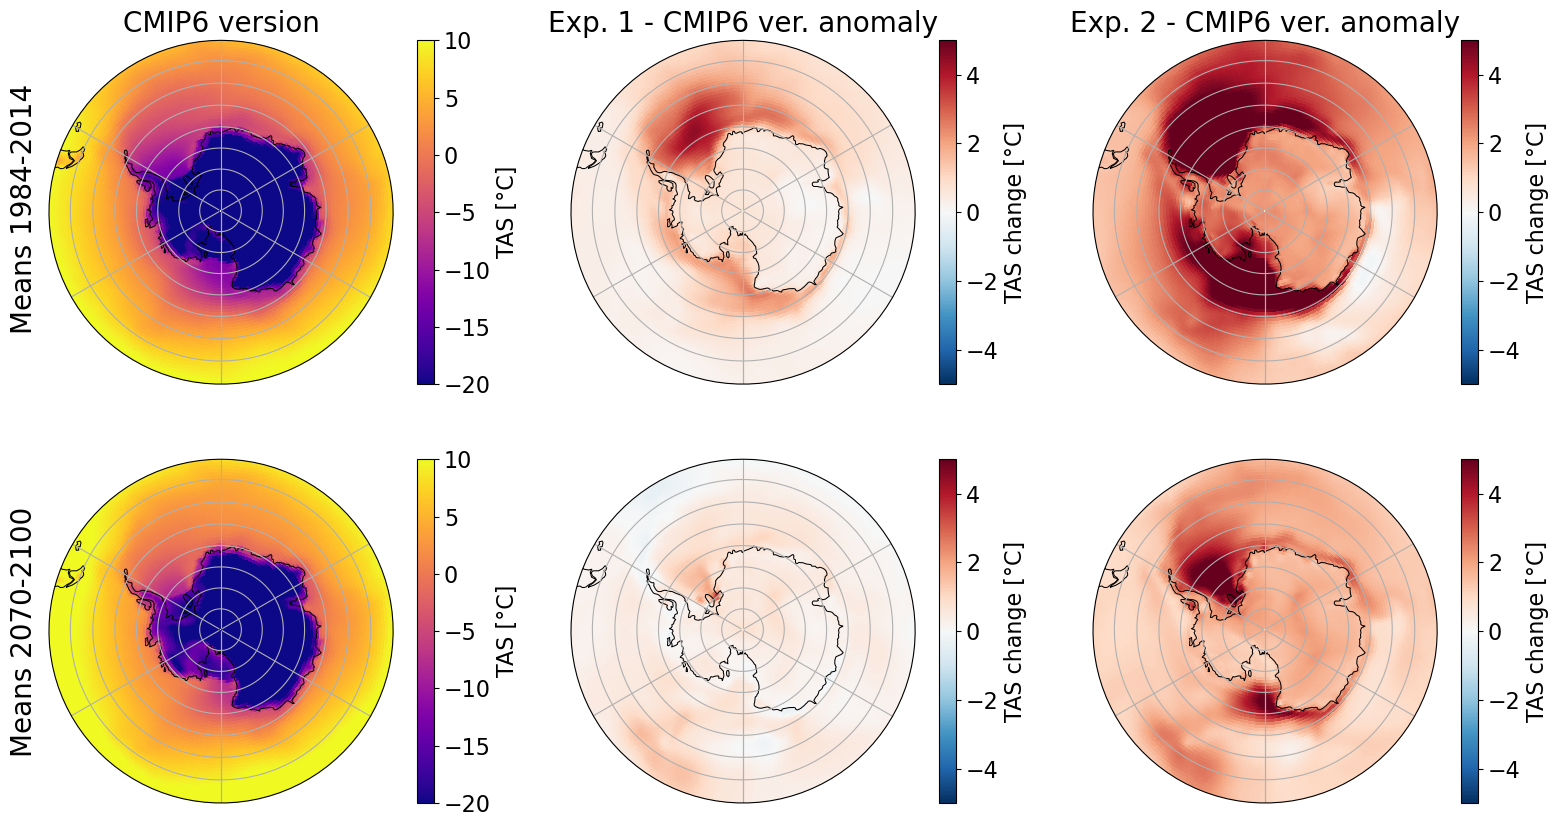

In [14]:
# Create a figure with 8 subplots 2 by 3
fig, axes = plt.subplots(2, 3, figsize=(8*sizemlf, 4.5*sizemlf), subplot_kw={'projection': ccrs.SouthPolarStereo()})
fig.tight_layout(pad=2)

cmin = -20
cmax = 10
map_plotter(tas_sd_rec, 
            tas_sd_hist, axes[0, 0], 'plasma', cmin, cmax, 
            'CMIP6 version', 'TAS [°C]')

map_plotter(tas_sd_fut, 
            tas_sd_585, axes[1, 0], 'plasma', cmin, cmax, 
            ' ', 'TAS [°C]')

cmin = -5
cmax = 5
map_plotter(tas_5icu_rec - tas_sd_rec, 
            tas_sd_hist, axes[0, 1], 'RdBu_r', cmin, cmax, 
            'Exp. 1 - CMIP6 ver. anomaly', 'TAS change [°C]')

map_plotter(tas_5icu_fut - tas_sd_fut, 
            tas_5icu_585, axes[1, 1], 'RdBu_r', cmin, cmax, 
            ' ', 'TAS change [°C]')

cmin = -5
cmax = 5
map_plotter(tas_lcic_rec - tas_sd_rec, 
            tas_lcic_hist, axes[0, 2], 'RdBu_r', cmin, cmax, 
            'Exp. 2 - CMIP6 ver. anomaly', 'TAS change [°C]')

map_plotter(tas_lcic_fut - tas_sd_fut, 
            tas_lcic_585, axes[1, 2], 'RdBu_r', cmin, cmax, 
            ' ', 'TAS change [°C]')

#adding text in the plots
plt.figtext(0.02, 0.58, 'Means 1984-2014', fontsize = 10*sizemlf, rotation = 'vertical')
plt.figtext(0.02, 0.11, 'Means 2070-2100', fontsize = 10*sizemlf, rotation = 'vertical')

#adjusting lay-out and padding of the subplots in order to reduce whitespace
plt.tight_layout(pad=1.2*sizemlf)
plt.subplots_adjust(top=0.9)
plt.show()